<a href="https://colab.research.google.com/github/jeekyung/ESAA/blob/main/ESAA_OB_week12_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD_%EA%B0%80%EC%9D%B4%EB%93%9C_ch9_8_pg_607~624.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **08. 파이썬 추천 시스템 패키지 - Surprise**
---

**Surprise 패키지 소개**

In [1]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 20.9 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633975 sha256=bd1b6c2fcb9c57a5b8bae2ca31328b321db32cc4b3088f69fbc71e0042ab28dd
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


>Surprise 패키지의 주요 장점:
* 다양한 추천 알고리즘, 예를 들어 사용자 또는 아이템 기반 최근접 이웃 협업 필터링, SVD, SVD++, NMF 기반의 잠재 요인 협업 필터링을 쉽게 적용해 추천 시스템 구축 가능

### **Surprise를 이용한 추천 시스템 구축**
---

추천 데이터를 학습용과 테스트용 데이터 세트로 분리한 뒤 SVD 행렬 분해를 통한 잠재 요인 협업 필터링 수행하는 예제.

In [2]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

>* Surprise에서 데이터 로딩을 Dataset 클래스를 이용해서만 가능함.
* Surprise는 userId(사용자 ID), movieId(영화 ID), rating(평점)과 같은 주요 데이터가 로우(Row) 레벨 형태로 돼있는 포맷의 데이터만 처리함.

In [3]:
# 무비렌즈 사이트에서 제공하는  데이터 세트 'ml-100k'(10만 개 평점 데이터) 내려받아 로딩.
data = Dataset.load_builtin('ml-100k',prompt=False)
# 수행 시마다 동일하게 데이터를 분할하기 위해 random_state 값 부여
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


>surprise에 사용자-아이템 평점 데이터를 적용할 때 주의해야 할 점: 무비렌즈 사이트에서 내려받은 데이터 파일과 동일하게 로우 레벨의 사용자-아이템 평점 데이터를 그대로 적용해야 한다는 점.
* 앞에서 로우 레벨의 사용자-아이템 아이디를 칼럼명으로 변환한 형태의 사용자-아이템 평점 행렬 데이터로 변환함.
* Surprise는 자체적으로 로우 레벨의 데이터를 칼럼 레벨의 데이터로 변경하므로 원본인 로우 레벨의 사용자-아이템 평점 데이터를 데이터 세트로 적용해야 함.

In [4]:
# SVD로 잠재 요인 협업 필터링 수행
algo = SVD()
algo.fit(trainset)  # 학습 데이터 세트 기반으로 추천 알고리즘 학습

>* 학습된 추천 알고리즘을 기반으로 테스트 데이터 세트에 대해 추천 수행.
* Surprise에서 추천을 예측하는 메서드: test() / predict()

In [5]:
# test(): 사용자-아이템 평점 데이터 세트 전체에 대해서 추천을 예측하는 메서드
# 즉, 입력된 데이터 세트에 대해 추천 데이터 세트 만들어줌.
predictions = algo.test(testset)
print('prediction type: ', type(predictions), 'size:', len(predictions))
print('prediction 결과의 최초 5개 추출')
predictions[:5]

prediction type:  <class 'list'> size: 25000
prediction 결과의 최초 5개 추출


[Prediction(uid='120', iid='282', r_ui=4.0, est=3.63926711523585, details={'was_impossible': False}),
 Prediction(uid='882', iid='291', r_ui=4.0, est=3.659327894111019, details={'was_impossible': False}),
 Prediction(uid='535', iid='507', r_ui=5.0, est=4.068718563599528, details={'was_impossible': False}),
 Prediction(uid='697', iid='244', r_ui=5.0, est=3.5326164215668157, details={'was_impossible': False}),
 Prediction(uid='751', iid='385', r_ui=4.0, est=3.3006847815649794, details={'was_impossible': False})]

In [7]:
# 리스트 객체 내에 내포된 Prediction 객체의 uid, iid, r_ui, est 등의 속성에 접근하려면 객체명, uid와 같은 형식으로.
[ (pred.uid, pred.iid, pred.est) for pred in predictions[:3] ]

[('120', '282', 3.63926711523585),
 ('882', '291', 3.659327894111019),
 ('535', '507', 4.068718563599528)]

In [8]:
# predict(): 개별 사용자의 아이템에 대한 추천 평점을 예측하는 메서드
# 사용자 아이디, 아이템 아이디는 문자열로 입력해야 함.
uid = str(196)
iid = str(302)
pred = algo.predict(uid, iid)
print(pred)

user: 196        item: 302        r_ui = None   est = 4.33   {'was_impossible': False}


* predict()는 개별 사용자와 아이템 정보를 입력하면 추천 예측 평점을 est로 반환함.
* test() 메서드는 입력 데이터 세트의 모든 사용자와 아이템 아이디에 대해서 predict()를 반복적으로 수행한 결과와 비슷함.

In [9]:
# 테스트 데이터 세트를 이용해 추천 예측 평점과 실제 평점과의 차이 평가
accuracy.rmse(predictions)

RMSE: 0.9501


0.9501499385022109

* 이처럼 surprise 패키지를 이용하면 쉽게 추천 시스템 구현 가능.

### **Surprise 주요 모듈 소개**
---

**Dataset**

>Surprise는 user_id(사용자 아이디), item_id(아이템 아이디), rating(평점) 데이터가 로우 레벨로 된 데이터 세트만 적용할 수 있음.

**OS 파일 데이터를 Surprise 데이터 세트로 로딩**

* Surprise에 OS 파일 로딩 시 로딩되는 데이터 파일에 칼럼명을 가지는 헤더 문자열이 있어서는 안됨.

In [14]:
import pandas as pd

ratings = pd.read_csv('/content/drive/MyDrive/ratings.csv')
# ratings_noh.csv 파일로 업로드 시 인덱스와 헤더를 모두 제거한 새로운 파일 생성
ratings.to_csv('/content/drive/MyDrive/ratings_noh.csv', index=False, header=False)

>* ratings_noh.csv를 dataset 모듈의 load_from_file()을 이용해 DataSet로 로드.
* Reader 클래스를 이용해 데이터 파일의 파싱 포맷을 먼저 정의해야 함.
* Reader 클래스는 로딩될 rating_noh.csv 파일의 파싱 정보를 알려주기 위해 사용됨.
* 지금 로딩하려는 ratings_noh.csv는 칼럼 헤더가 없고, 4개의 칼럼이 콤마로만 분리되어 있어 로딩할 때 알려줘야 함.

In [16]:
from surprise import Reader

reader = Reader(line_format = 'user item rating timestamp', sep=',', rating_scale=(0.5,5))
data=Dataset.load_from_file('/content/drive/MyDrive/ratings_noh.csv',reader=reader)

>Reader 클래스의 주요 생성 파라미터:
* line_format (string): 칼럼을 순서대로 나열. 입력된 문자열을 공백으로 분리해 칼럼으로 인식
* sep (char): 칼럼을 분리하는 분리자이며, 디폴트는 '\t'
* rating_scale (tuple, optional): 평점 값의 최소~최대 평점 설정. 디폴트는 (1,5)이지만 rating.csv 파일의 경우는 최소 평점이 0.5, 최대 평점이 0.5

In [17]:
# SVD 행렬 분해 기법을 이용해 추천 예측
trainset, testset = train_test_split(data, test_size =.25, random_state=0)

algo = SVD(n_factors=50, random_state=0)

# 학습 데이터 세트로 학습하고 나서 테스트 데이터 세트로 평점 예측 후 RMSE 평가
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

**판다스 DataFrame에서 Surprise 데이터 세트로 로딩**

>Dataset.load_from_df()를 이용하면 판다스의 DataFrame에서도 Surprise 데이터 세트로 로딩할 수 있음.

In [18]:
import pandas as pd
from surprise import Reader, Dataset

ratings = pd.read_csv('/content/drive/MyDrive/ratings.csv')
reader = Reader(rating_scale = (0.5,5.0))

# ratings DataFrame에서 칼럼은 사용자 아이디, 아이템 아이디, 평점 순서를 지켜야 함
data = Dataset.load_from_df(ratings[['userId','movieId','rating']],reader)
trainset,testset = train_test_split(data,test_size = 0.25,random_state = 0)

algo = SVD(n_factors = 50,random_state = 0)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

### **Surprise 추천 알고리즘 클래스**
---

>Surprise에서 추천 예측을 위해 자주 사용되는 추천 알고리즘 클래스:
* SVD: 행렬 분해를 통한 잠재 요인 협업 필터링을 위한 SVD 알고리즘
* KNNBasic: 최근접 이웃 협업 필터링을 위한 KNN 알고리즘
* BaselineOnly: 사용자 Bias와 아이템 Bias를 감안한 SGD 베이스라인 알고리즘

>Surprise SVD의 비용 함수는 사용자 베이스라인(Baseline) 편향성을 감안한 평점 예측에 Regularization을 적용한 것.<br/>
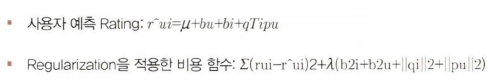

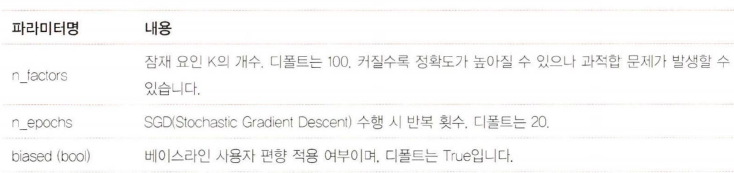

>SVD++ 알고리즘의 RMSE, MAE 성적이 가장 좋지만, 상대적으로 시간이 너무 오래 걸려 데이터가 조금만 더 커져도 사용하기 어려움<br/>
SVD++를 제외하면 SVD와 k-NN Baseline이 가장 성능 평가 수치가 좋음.<br/>
k-NN 자체는 성능이 상대적으로 뒤지지만, Baseline을 결합한 경우 성능 평가 수치 대폭 향상.<br/>
Baseline이라는 의미는 각 개인이 평점을 부여하는 성향을 반영해 평점을 계산하는 방식 말함.

### **베이스라인 평점**
---

>베이스라인 평점(Baseline Rating): 개인의 성향을 반영해 아이템 평가에 편향성(bias) 요소를 반영하여 평점을 부과하는 것<br/>
베이스라인 평점 = 전체 평균 평점 + 사용자 편향 점수 + 아이템 편향 점수
* 전체 평균 평점 = 모든 사용자의 아이템에 대한 평점을 평균한 값
* 사용자 편향 점수 = 사용자별 아이템 평점 평균 값 - 전체 평균 평점
* 아이템 편향 점수 = 아이템별 평점 평균 값 - 전체 평균 평점

### **교차 검증과 하이퍼 파라미터 튜닝**
---

In [19]:
from surprise.model_selection import cross_validate

ratings = pd.read_csv('/content/drive/MyDrive/ratings.csv')
reader = Reader(rating_scale = (0.5,5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']],reader)

algo = SVD(random_state = 0)
cross_validate(algo, data, measures = ['RMSE','MAE'],cv = 5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8766  0.8775  0.8652  0.8763  0.8705  0.8732  0.0047  
MAE (testset)     0.6730  0.6725  0.6657  0.6734  0.6696  0.6708  0.0029  
Fit time          6.14    6.39    5.36    5.31    5.41    5.72    0.45    
Test time         0.25    0.26    0.14    0.33    0.16    0.23    0.07    


{'test_rmse': array([0.87661003, 0.87748875, 0.86517576, 0.87628256, 0.87050123]),
 'test_mae': array([0.67300752, 0.67251538, 0.66569249, 0.67339858, 0.66956859]),
 'fit_time': (6.1429502964019775,
  6.3932483196258545,
  5.355567693710327,
  5.306922197341919,
  5.408476829528809),
 'test_time': (0.2549445629119873,
  0.2584049701690674,
  0.13787460327148438,
  0.3303844928741455,
  0.16126632690429688)}

>cross_validate()는 폴드별 성능 평가 수치와 전체 폴드의 평균 성능 평가 수치를 함께 보여줌.

In [20]:
from surprise.model_selection import GridSearchCV

# 최적화할 파라미터를 딕셔너리 형태로 지정.
param_grid = {
    'n_epochs': [20, 40, 60], 
    'n_factors': [50, 100, 200]
}

#CV를 3개 폴트 세트로 지정, 성능 평가는 rmse, mse로 수행하도록 GridSearchCV 구성
gs = GridSearchCV(SVD, param_grid, measures = ['rmse', 'mae'],cv = 3)
gs.fit(data)

# 최고 RMSE Evaluation 점수와 그때의 하이퍼 파라미터
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.8787777652061353
{'n_epochs': 20, 'n_factors': 50}


### **Surprise를 이용한 개인화 영화 추천 시스템 구축**
---

>Surprise를 이용해 잠재 요인 협업 필터링 기반의 개인화된 영화 추천 구현.<br/>
Surprise 패키지로 학습된 추천 알고리즘을 기반으로 특정 사용자가 아직 평점을 매기지 않은(관람하지 않은) 영화 중 개인 취향에 가장 적절한 영화 추천.

In [21]:
# 다음 코드는 train_test_split으로 분리되지 않는 데이터 세트에 fit()을 호출해 오류가 발생함.

data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']],reader)
algo = SVD(n_factors = 50, random_state = 0)
algo.fit(data)

AttributeError: ignored

In [22]:
from surprise.dataset import DatasetAutoFolds

reader = Reader(line_format = 'user item rating timestamp', sep = ',', rating_scale =(0.5,5))
# DatasetAutoFolds 클래스를 ratings_noh.csv 파일 기반으로 생성.
data_folds = DatasetAutoFolds(ratings_file = '/content/drive/MyDrive/ratings_noh.csv',reader = reader)

#전체 데이터를 학습 데이터로 생성함.
trainset = data_folds.build_full_trainset()

In [23]:
# 생성된 학습 데이터를 기반으로 학습 수행 후 아직 보지 않은 영화 목록 확인
# 먼저 SVD를 이용해 학습 수행.
algo = SVD(n_epochs = 20, n_factors = 50, random_state = 0)
algo.fit(trainset)

In [24]:
# 영화에 대한 상세 속성 정보 DataFrame 로딩
movies = pd.read_csv('/content/drive/MyDrive/movies.csv')

# userId=9의 movieId 데이터를 추출해 movieId=42 데이터가 있는지 확인.
movieIds = ratings[ratings['userId'] ==9]['movieId']

if movieIds[movieIds==42].count() == 0:
  print('사용자 아이디 9는 영화 아이디 42의 평점 없음')

print(movies[movies['movieId'] == 42])

사용자 아이디 9는 영화 아이디 42의 평점 없음
    movieId                   title              genres
38       42  Dead Presidents (1995)  Action|Crime|Drama


In [25]:
# movieId=42인 이 영화에 대해 userId 9 사용자의 추천 예상 평점: predict() 메서드 이용
uid = str(9)
iid = str(42)

pred = algo.predict(uid,iid,verbose = True)

user: 9          item: 42         r_ui = None   est = 3.13   {'was_impossible': False}


In [26]:
# 이제 사용자가 평점을 매기지 않은 전체 영화 추출 뒤 예측 평점 순으로 영화 추천.
# 먼저 추천 대상이 되는 영화 추출.
def get_unseen_surprise(ratings, movies, userId):
  # 입력값으로 들어온 userId에 해당하는 사용자가 평점을 매긴 모든 영화를 리스트로 생성.
  seen_movies = ratings[ratings['userId'] == userId]['movieId'].tolist()

  # 모든 영화의 movieId를 리스트로 생성.
  total_movies = movies['movieId'].tolist()
  
  # 모든 영화의 movieId 중 이미 평점을 매긴 영화의 movieId를 제외한 후 리스트로 생성
  unseen_movies = [movie for movie in total_movies if movie not in seen_movies]
  print('평점 매긴 영화 수 :', len(seen_movies), '추천 대상 영화 수:', len(unseen_movies),
        '전체 영화 수:', len(total_movies))

  return unseen_movies

unseen_movies = get_unseen_surprise(ratings, movies, 9)

평점 매긴 영화 수 : 46 추천 대상 영화 수: 9696 전체 영화 수: 9742


> 사용자 아이디 9번은 전체 9742개의 영화 중 46개만 평점을 매김.

In [27]:
def recomm_movie_by_surprise(algo,userId, unseen_movies, top_n = 10):

  # 알고리즘 객체의 predict() 메서드를 평점이 없는 영화에 반복 수행한 후 결과를 list 객체로 저장
  predictions = [algo.predict(str(userId), str(movieId)) for movieId in unseen_movies]

  # prediction list 객체는 surprise의 Prediction 객체를 원소로 가지고 있음
  # [Prediction(uid='9', iid='1', est=3.69), Prediction(uid='9', iid='2', est=2.98),,,,]
  
  # 이를 est 값으로 정렬하기 위해서 아래의 sortkey_est 함수를 정의함.
  def sortkey_est(pred) :
    return pred.est

  # sortkey_est() 반환값의 내림 차순으로 정렬 수행하고 top_n개의 최상위 값 추출.
  predictions.sort(key = sortkey_est, reverse = True)
  top_predictions = predictions[:top_n]

  # top_n으로 추출된 영화의 정보 추출, 영화 아이디, 추천 예상 평점, 제목 추출
  top_movie_ids = [int(pred.iid) for pred in top_predictions]
  top_movie_rating = [pred.est for pred in top_predictions]
  top_movie_titles = movies[movies.movieId.isin(top_movie_ids)]['title']

  top_movie_preds = [ (id, title, rating) for id, title, rating in 
                     zip(top_movie_ids, top_movie_titles, top_movie_rating)]

  return top_movie_preds

unseen_movies = get_unseen_surprise(ratings, movies, 9)
top_movie_preds = recomm_movie_by_surprise(algo, 9, unseen_movies, top_n = 10)

print('##### Top-10 추천 영화 리스트 #####')
for top_movie in top_movie_preds :
  print(top_movie[1], ":", top_movie[2])

평점 매긴 영화 수 : 46 추천 대상 영화 수: 9696 전체 영화 수: 9742
##### Top-10 추천 영화 리스트 #####
Usual Suspects, The (1995) : 4.306302135700814
Star Wars: Episode IV - A New Hope (1977) : 4.281663842987387
Pulp Fiction (1994) : 4.278152632122759
Silence of the Lambs, The (1991) : 4.226073566460876
Godfather, The (1972) : 4.1918097904381995
Streetcar Named Desire, A (1951) : 4.154746591122658
Star Wars: Episode V - The Empire Strikes Back (1980) : 4.122016128534504
Star Wars: Episode VI - Return of the Jedi (1983) : 4.108009609093436
Goodfellas (1990) : 4.083464936588478
Glory (1989) : 4.07887165526957
